# Security_Patches_Dataset

In abstract,


...We scraped the entire CVE details database for GitHub references and augmented the data with 3 security-related datasets. We used the data to create a ground-truth dataset of natural language artifacts (such as commit messages, commits comments, and summaries), meta-data and code changes. __Our dataset integrates a total of 8057 security-relevant commits -- the equivalent to 5942 security patches -- from 1339 different projects spanning 146 different types of vulnerabilities and 20 languages.__ A dataset of 110k non-security-related commits is also provided. Data and scripts are all available on GitHub. Data is stored in a .CSV file. ...

https://arxiv.org/abs/2110.09635


After preprocessing, total 6902

In [3]:
import pandas as pd
import numpy as np 

In [4]:
def concat_to_df(df):
    df_temp = []
    for chunk in df:
        df_temp.append(chunk)

    df = pd.concat(df_temp,ignore_index = True)
    return df

## Respective Dataset Analysis

In [5]:
data_dir = 'security-patches-dataset/data/'

In [6]:
big_vul = pd.read_csv(data_dir+"bigvul/all-bigvul-patches.csv", on_bad_lines='skip', chunksize=10000)

cve_details = pd.read_csv(data_dir+"cve-details/all-cve-details-patches.csv", on_bad_lines='skip', chunksize=10000)

osv = pd.read_csv(data_dir+"osv/all-osv-patches.csv", on_bad_lines='skip', chunksize=10000)

nvd = pd.read_csv(data_dir+"nvd/all-nvd-patches.csv", on_bad_lines='skip', chunksize=10000)

sap = pd.read_csv(data_dir+"sap/all-sap-patches.csv", on_bad_lines='skip', chunksize=10000)

secbench = pd.read_csv(data_dir+"secbench/github-secbench-patches.csv", on_bad_lines='skip', chunksize=10000)

In [7]:
big_vul_df = concat_to_df(big_vul)
print(big_vul_df.shape[0])
big_vul_df.head(1)

9546


,Unnamed: 0,authentication_required,availability_impact,cve_id,cve_page,cwe_id,access_complexity,confidentiality_impact,integrity_impact,publish_date,...,vulnerability_classification,refs,commit_id,commit_message,files_changed,lang,project,version_after_fix,version_before_fix,code_refs
0,"{\sha\"": \""8fb70313eb8835dcce812a86209e2a7d884...","\""filename\"": \""pango/glyphstring.c\""","\""status\"": \""modified\""","\""additions\"": 20","\""deletions\"": 6","\""changes\"": 26","\""blob_url\"": \""https://github.com/bratsche/p...","\""raw_url\"": \""https://github.com/bratsche/pa...","\""contents_url\"": \""https://api.github.com/re...","\""patch\"": \""@@ -61",...,"truncated\\\"");\\n-\\t new_len = string->spa...",G_MAXSIZE / MAX (sizeof(PangoGlyphInfo),sizeof(gint)));\\n+\\n+\\t guint more_space ...,\\n+\\t\\t\\t G_STRLOC,new_len);\\n+\\t\\t}\\n+\\t }\\n+\\n+\\t ...,C,pango,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,1c9433bfe43890b102c8cead8ab3ee34b44c5c37,{'https://github.com/bratsche/pango/commit/4de...


In [8]:
big_vul_df =big_vul_df.loc[:,['vulnerability_classification','cwe_id','lang','version_after_fix','version_before_fix']]
big_vul_df.head(10)

,vulnerability_classification,cwe_id,lang,version_after_fix,version_before_fix
0,"truncated\\\"");\\n-\\t new_len = string->spa...","\""changes\"": 26",C,4de30e5500eaeb49f4bf0b7a07f718e149a2ed5e,1c9433bfe43890b102c8cead8ab3ee34b44c5c37
1,C,"\""changes\"": 2",NaN,NaN,NaN
2,7 @@ void parser(void)\\n addreply...,"\""changes\"": 11",67b0385e0871ad3fc48b2244abb30eb673161146,NaN,NaN
3,7 @@ int mainloop(CLIENT *client) {\\n \\n \\t...,"\""changes\"": 4",3ef52043861ab16352d49af89e048ba6339d6df8,{'https://github.com/yoe/nbd/commit/3ef5204386...,NaN
4,zone);\\n-\\telse\\n-\\t\\tzone_pcp_update(zo...,"\""changes\"": 15",linux,9adb62a5df9c0fbef7b4665919329f73a34651ed,{'https://github.com/torvalds/linux/commit/08d...
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [9]:
cve_details_df = concat_to_df(cve_details)
print(cve_details_df.size)
cve_details_df.head(3)

140284


,cve_id,cve_href,cwe_id,vuln_type,publish_date,update_date,score,acces_level,access,complexity,authentication,confidentiality,integrity,availability,summary,refs,code_refs
0,CVE-2008-5619,https://www.cvedetails.com/cve/CVE-2008-5619/,CWE-94,Exec Code,2008-12-17,2018-10-11,10.0,None,Remote,Low,Not required,Complete,Complete,Complete,html2text.php in Chuggnutt HTML to Text Conver...,{'https://www.redhat.com/archives/fedora-packa...,{'https://github.com/PHPMailer/PHPMailer/commi...
1,CVE-2008-5189,https://www.cvedetails.com/cve/CVE-2008-5189/,CWE-352,Http R.Spl.,2008-11-21,2019-08-08,5.0,None,Remote,Low,Not required,None,Partial,None,CRLF injection vulnerability in Ruby on Rails ...,{'http://lists.opensuse.org/opensuse-security-...,{'https://github.com/rails/rails/commit/7282ed...
2,CVE-2020-35848,https://www.cvedetails.com/cve/CVE-2020-35848/,CWE-89,Sql,2020-12-30,2021-08-10,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,Agentejo Cockpit before 0.11.2 allows NoSQL in...,{'https://github.com/agentejo/cockpit/commit/7...,{'https://github.com/agentejo/cockpit/commit/2...


In [10]:
osv_df = concat_to_df(osv)
print(osv_df.shape[0])
osv_df.head(3)

20382


,ecosystem,vuln_id,summary,details,aliases,modified_date,published_date,severity,score,cwe_id,refs,introduced,code_refs
0,GHSA,GHSA-227g-7cvv-6ff3,Apache Tapestry 5.8.1 vulnerable to ReDoS via ...,Apache Tapestry up to version 5.8.1 is vulnera...,{'CVE-2022-31781'},2022-07-22T16:31:44Z,2022-07-14T00:00:23Z,HIGH,7.5,{'CWE-1333'},{'https://www.openwall.com/lists/oss-security/...,NaN,{'https://github.com/apache/tapestry-5/commit/...
1,GHSA,GHSA-22hc-47cc-7x6f,Cross-site Scripting in Pimcore,Pimcore prior to 10.4.0 is vulnerable to store...,{'CVE-2022-0894'},2022-03-29T21:21:30Z,2022-03-16T00:00:48Z,MODERATE,5.4,{'CWE-79'},{'https://github.com/pimcore/pimcore/commit/6e...,NaN,{'https://github.com/pimcore/pimcore/commit/6e...
2,GHSA,GHSA-22p3-qrh9-cx32,URL previews of unusual or maliciously-crafted...,### Impact\n\nURL previews of some web pages c...,{'CVE-2022-31052'},2022-07-11T19:26:17Z,2022-06-29T21:51:23Z,MODERATE,6.5,{'CWE-674'},{'https://lists.fedoraproject.org/archives/lis...,NaN,{'https://github.com/matrix-org/synapse/commit...


In [11]:
nvd_df = concat_to_df(nvd)
print(nvd_df.shape[0])
nvd_df.head(3)

9618


,cve_id,cwes,description,severity,exploitability,impact,published_date,last_modified_date,refs,code_refs
0,CVE-1999-0199,{'CWE-252'},manual/search.texi in the GNU C Library (aka g...,HIGH,10.0,6.4,2020-10-06T13:15Z,2020-12-03T16:52Z,{'https://github.com/bminor/glibc/commit/2864e...,{'https://github.com/bminor/glibc/commit/2864e...
1,CVE-1999-0731,{'NVD-CWE-Other'},The KDE klock program allows local users to un...,MEDIUM,3.9,6.4,1999-06-23T04:00Z,2021-01-20T01:15Z,"{'http://www.securityfocus.com/bid/489', 'http...",{'https://github.com/KDE/kde1-kdebase/commit/0...
2,CVE-2002-2443,{'CWE-20'},schpw.c in the kpasswd service in kadmind in M...,MEDIUM,10.0,2.9,2013-05-29T14:29Z,2021-02-02T18:44Z,"{'http://www.ubuntu.com/usn/USN-2810-1', 'http...",{'https://github.com/krb5/krb5/commit/cf1a0c41...


In [12]:
# PONTAS - No CWE
sap_df = concat_to_df(sap)
print(sap_df.size)
sap_df.head(3)

6410


,cve_id,project,sha,type,refs
0,CVE-2017-4971,https://github.com/spring-projects/spring-webflow,57f2ccb66946943fbf3b3f2165eac1c8eb6b1523,pos,https://github.com/spring-projects/spring-webf...
1,CVE-2018-1000134,https://github.com/pingidentity/ldapsdk,8471904a02438c03965d21367890276bc25fa5a6,pos,https://github.com/pingidentity/ldapsdk/commit...
2,CVE-2016-8749,https://github.com/apache/camel,57d01e2fc8923263df896e9810329ee5b7f9b69,pos,https://github.com/apache/camel/commit/57d01e2...


In [13]:
secbench_df = concat_to_df(secbench)
print(secbench_df.shape[0])
secbench_df.head(3)

676


,owner,project,sha,sha-p,year,language,cve_id,cwe_id,score,severity
0,pfsense,pfsense,002bc4ab3268e6e5cb3a01ce73a4c1624d09050a,d6a0379d291f5e98500776618559343f40254e40,2010,php,NaN,CWE-77,NaN,NaN
1,nextcloud,server,0074062b5329c3d43679909fddce2d70608a4475,5c6a7172cafc395d38c58d1b5afd6b36efb33ad5,2012,php,NaN,CWE-79,NaN,NaN
2,nextcloud,server,0241ddc759f7e2d2695c4626df5d2ac27b8b1d90,c2e2c59ca7aa873bd07de04ea701a8b351383aec,2014,php,NaN,CWE-384,NaN,NaN


## Analysis of  security_patches_v1.0.csv
* All vulnerable dataset
* Dropped the missing values in CWE id

In [14]:
security_patches = pd.read_csv("security-patches-dataset/dataset/security_patches_v1.0.csv", on_bad_lines='skip', chunksize=10000)

In [15]:
security_patches_df = concat_to_df(security_patches)
print(security_patches_df.shape[0])
security_patches_df.head(3)

8057


,cve_id,project,sha,dataset,cwe_id,vuln_type,score,github,summary,language,vulnerable,message,author,date,comments,files,parents,ext_files,lang
0,CVE-2016-6307,https://github.com/openssl/openssl,c1ef7c971d0bbf117c3c80f65b5875e2e7b024b1,SECBENCH,CWE-400,Denial Of Service,4.3,https://github.com/openssl/openssl/commit/c1ef...,The state-machine implementation in OpenSSL 1....,c,yes,Excessive allocation of memory in tls_get_mess...,Matt Caswell,"09/19/2016, 10:39:21",{},"{'ssl/statem/statem.c': {'additions': 11, 'del...",{'41bff723c6784cc846054a4fd4add6dbec8c2c64'},{'c'},{'C/C++'}
1,NaN,https://github.com/AFNetworking/AFNetworking,c23c37ab4ab9b2401e824df717538e37bc5c85a4,SECBENCH,CWE-401,NaN,NaN,https://github.com/AFNetworking/AFNetworking/c...,NaN,m,yes,fix memory leak in NSURLSession,Oleg Naumenko,"06/18/2015, 15:07:20",{},{'AFNetworking/AFURLSessionManager.m': {'addit...,{'92006270b12ed6778095afc9d8bae9b54210df18'},{'m'},{'Objective-C'}
2,CVE-2017-6797,https://github.com/mantisbt/mantisbt,c272c3f65da9677e505ff692b1f1e476b3afa56e,SECBENCH,CWE-79,NaN,4.3,https://github.com/mantisbt/mantisbt/commit/c2...,A cross-site scripting (XSS) vulnerability in ...,php,yes,Fix XSS in bug_change_status_page.php\n\nThe v...,Damien Regad,"03/07/2017, 11:34:16",{},{'bug_change_status_page.php': {'additions': 1...,{'f8b2510febf47700b3e29b4d0c746e2d16c29487'},{'php'},{'PHP'}


In [33]:
df =security_patches_df.loc[:,['dataset','cwe_id','vulnerable','language','summary','files']]
df.head(10)

,dataset,cwe_id,vulnerable,language,summary,files
0,SECBENCH,CWE-400,yes,c,The state-machine implementation in OpenSSL 1....,"{'ssl/statem/statem.c': {'additions': 11, 'del..."
1,SECBENCH,CWE-401,yes,m,NaN,{'AFNetworking/AFURLSessionManager.m': {'addit...
2,SECBENCH,CWE-79,yes,php,A cross-site scripting (XSS) vulnerability in ...,{'bug_change_status_page.php': {'additions': 1...
3,SECBENCH,CWE-89,yes,php,NaN,{'libraries/joomla/installer/adapters/componen...
4,SECBENCH,CWE-401,yes,c,NaN,"{'lib/formdata.c': {'additions': 25, 'deletion..."
5,SECBENCH,CWE-189,yes,c,"Integer underflow in OpenSSL before 0.9.8x, 1....","{'CHANGES': {'additions': 8, 'deletions': 0, '..."
6,SECBENCH,CWE-89,yes,php,SQL injection vulnerability in include/functio...,"{'docs/NEWS': {'additions': 3, 'deletions': 0,..."
7,SECBENCH,CWE-401,yes,c,NaN,"{'lib/vtls/mbedtls.c': {'additions': 11, 'dele..."
8,SECBENCH,CWE-79,yes,php,NaN,"{'ChangeLog': {'additions': 3, 'deletions': 0,..."
9,SECBENCH,CWE-352,yes,php,NaN,{'src/Controller/Component/SecurityComponent.p...


In [54]:
df['files'][0]

"{'ssl/statem/statem.c': {'additions': 11, 'deletions': 0, 'changes': 11, 'status': 'modified'}, 'ssl/statem/statem_lib.c': {'additions': 0, 'deletions': 10, 'changes': 10, 'status': 'modified'}}"

### Dataset sources

In [34]:
df.value_counts(subset='dataset')

dataset
BIGVUL        4047
CVEDETAILS    2224
PONTAS        1127
SECBENCH       659
dtype: int64

### Language counts

In [35]:
df.value_counts(subset='language')

language
php             269
c               164
rb               73
py               46
java             29
m                19
js               13
config_files     12
mm                8
cpp               7
scala             5
groovy            3
h                 3
inc               3
cc                2
html              1
ctp               1
tpl               1
dtype: int64

### Vulnerable data count

In [36]:
print(df['vulnerable'].unique()) 

['yes']


In [37]:
df.value_counts(subset='vulnerable',dropna=False)

vulnerable
yes    8057
dtype: int64

In [38]:
num_missing = df['vulnerable'].isnull().sum().sum()
print(num_missing)

0


## CWE Id analysis
* nan : non-vulnerable? -> No, missing value
* NVD-CWE-Other -> Drop

In [39]:
print(len(df['cwe_id'].unique()))
print(df['cwe_id'].unique()) 

146
['CWE-400' 'CWE-401' 'CWE-79' 'CWE-89' 'CWE-189' 'CWE-352' nan 'CWE-20'
 'CWE-78' 'CWE-399' 'CWE-310' 'CWE-190' 'CWE-94' 'CWE-402' 'CWE-928'
 'CWE-22' 'CWE-416' 'CWE-264' 'CWE-1021' 'CWE-404' 'CWE-119' 'CWE-384'
 'CWE-74' 'CWE-17' 'CWE-843' 'NVD-CWE-Other' 'CWE-121' 'CWE-98' 'CWE-200'
 'CWE-208' 'CWE-476' 'CWE-667' 'CWE-287' 'CWE-403' 'CWE-362' 'CWE-16'
 'CWE-59' 'CWE-134' 'CWE-125' 'CWE-255' 'CWE-415' 'CWE-254' 'CWE-18'
 'CWE-19' 'CWE-284' 'CWE-787' 'CWE-388' 'CWE-285' 'CWE-502' 'CWE-862'
 'CWE-835' 'CWE-617' 'CWE-269' 'CWE-772' 'CWE-834' 'CWE-369' 'CWE-754'
 'CWE-494' 'CWE-943' 'CWE-665' 'CWE-434' 'CWE-770' 'CWE-755' 'CWE-129'
 'CWE-674' 'CWE-191' 'CWE-1187' 'CWE-682' 'CWE-732' 'CWE-522' 'CWE-918'
 'CWE-358' 'CWE-295' 'CWE-346' 'CWE-532' 'CWE-320' 'CWE-426' 'CWE-77'
 'CWE-704' 'CWE-116' 'CWE-347' 'CWE-824' 'CWE-693' 'CWE-436' 'CWE-90'
 'CWE-290' 'CWE-763' 'CWE-120' 'CWE-611' 'CWE-345' 'CWE-93' 'CWE-601'
 'CWE-706' 'CWE-361' 'CWE-281' 'CWE-311' 'CWE-668' 'CWE-664' 'CWE-275'
 'CWE-

### Drop the inconsistent vulnerable data 
* Exceptional label e.g. NVD-CWE-Other
* No cwe id information (Vulnerable data should contain CWE ID )

In [40]:
# Drop the Exceptional label e.g. NVD-CWE-Other
exp_drop_index = df[df['cwe_id']=='NVD-CWE-Other'].index
df = df.drop(exp_drop_index, axis=0)
if 'NVD-CWE-Other' in df['cwe_id'].unique():
    print("Error - fail to drop 'NVD-CWE-Other'")
else:
    print("Drop 'NVD-CWE-Other' in cwe_id column successfully")

Drop 'NVD-CWE-Other' in cwe_id column successfully


In [41]:
print(f"# of NaN in cwe id column: {df[df['cwe_id'].isna()].shape[0]}")

drop_df = df[(df['cwe_id'].isna()) & (df['vulnerable']=='yes')]
print(f"# of vulnerable dataset needed to be dropped in cwe id column: {drop_df.shape[0]}")

drop_df.head(3)

# of NaN in cwe id column: 1149
# of vulnerable dataset needed to be dropped in cwe id column: 1149


,dataset,cwe_id,vulnerable,language,summary,files
10,SECBENCH,NaN,yes,php,NaN,"{'ChangeLog': {'additions': 3, 'deletions': 0,..."
32,SECBENCH,NaN,yes,php,NaN,"{'wp-admin/categories.php': {'additions': 1, '..."
33,SECBENCH,NaN,yes,php,NaN,{'app/Controller/EventsController.php': {'addi...


### Check if NaN in CWE id stands for Missing values

In [42]:
print(f"# of vulnerable dataset needed to be dropped: {drop_df.shape[0]}")
drop_df.value_counts(subset='vulnerable',dropna=False)

# of vulnerable dataset needed to be dropped: 1149


vulnerable
yes    1149
dtype: int64

In [43]:
bef_df_size = df.shape[0]

# drop the inconsistent rows
vul_drop_indices = drop_df.index

# check if indices exist in df before dropping
vul_drop_indices = vul_drop_indices[vul_drop_indices.isin(df.index)]
df = df.drop(vul_drop_indices, axis=0)


In [47]:
# Confirm the drop is sucessfully done
aft_df_size = df.shape[0]
print(f"Dataset size before dropping missing value: {bef_df_size}")
print(f"Dataset size after dropping missing value: {aft_df_size}")
if (bef_df_size - aft_df_size == vul_drop_indices.size):
    print(f"# of vulnerable dataset needed to be dropped: {df[(df['cwe_id'].isna()) & (df['vulnerable'] =='yes' )].shape[0]}")
    print("Drop the missing value successfully")
else:
    print(f"Error - fail to drop the missing value: need to drop {vul_drop_list.size} but dropped {bef_df_size - aft_df_size}")

Dataset size before dropping missing value: 8051
Dataset size after dropping missing value: 6902
# of vulnerable dataset needed to be dropped: 0
Drop the missing value successfully


In [48]:
# replace NaN to non-vulnerable in cwe id column
df['cwe_id'] = df['cwe_id'].replace(np.nan, 'non-vulnerable')
print(df['cwe_id'].unique()) 

['CWE-400' 'CWE-401' 'CWE-79' 'CWE-89' 'CWE-189' 'CWE-352' 'CWE-20'
 'CWE-78' 'CWE-399' 'CWE-310' 'CWE-190' 'CWE-94' 'CWE-402' 'CWE-928'
 'CWE-22' 'CWE-416' 'CWE-264' 'CWE-1021' 'CWE-404' 'CWE-119' 'CWE-384'
 'CWE-74' 'CWE-17' 'CWE-843' 'CWE-121' 'CWE-98' 'CWE-200' 'CWE-208'
 'CWE-476' 'CWE-667' 'CWE-287' 'CWE-403' 'CWE-362' 'CWE-16' 'CWE-59'
 'CWE-134' 'CWE-125' 'CWE-255' 'CWE-415' 'CWE-254' 'CWE-18' 'CWE-19'
 'CWE-284' 'CWE-787' 'CWE-388' 'CWE-285' 'CWE-502' 'CWE-862' 'CWE-835'
 'CWE-617' 'CWE-269' 'CWE-772' 'CWE-834' 'CWE-369' 'CWE-754' 'CWE-494'
 'CWE-943' 'CWE-665' 'CWE-434' 'CWE-770' 'CWE-755' 'CWE-129' 'CWE-674'
 'CWE-191' 'CWE-1187' 'CWE-682' 'CWE-732' 'CWE-522' 'CWE-918' 'CWE-358'
 'CWE-295' 'CWE-346' 'CWE-532' 'CWE-320' 'CWE-426' 'CWE-77' 'CWE-704'
 'CWE-116' 'CWE-347' 'CWE-824' 'CWE-693' 'CWE-436' 'CWE-90' 'CWE-290'
 'CWE-763' 'CWE-120' 'CWE-611' 'CWE-345' 'CWE-93' 'CWE-601' 'CWE-706'
 'CWE-361' 'CWE-281' 'CWE-311' 'CWE-668' 'CWE-664' 'CWE-275' 'CWE-1188'
 'CWE-521' 'CWE-184

### Confirm that the all the rest dataset are consistent

Checklist 
* No CWE ID && Vulnerable (shouldn't contain in the dataset) is 0
* CWE ID && non-vulnerable (possibly existing but concerned) 

In [49]:
# NaN means non-vulnerable? Yes
print("# of NaN(non-vulnerable) in cwe_id: ", df['cwe_id'].isna().count())
print("# of unmatched dataset (No cwe id & vulnerable): ", df[(df['cwe_id'].notnull()) & (df['vulnerable'] =='yes' )].shape[0])
print("# of unmatched dataset (cwe id & non-vulnerable): ", df[(df['cwe_id'].isna()) & (df['vulnerable'] !='yes' )].shape[0])

# of NaN(non-vulnerable) in cwe_id:  6902
# of unmatched dataset (No cwe id & vulnerable):  6902
# of unmatched dataset (cwe id & non-vulnerable):  0


cwe_id
CWE-79     870
CWE-20     712
CWE-119    705
CWE-200    419
CWE-125    380
          ... 
CWE-774      1
CWE-776      1
CWE-335      1
CWE-331      1
CWE-403      1
Length: 144, dtype: int64


<Axes: xlabel='count', ylabel='cwe_id'>

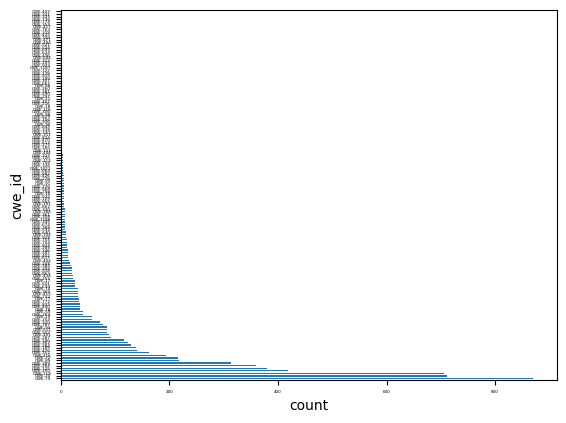

In [50]:
print(df.value_counts(subset='cwe_id'))
df.value_counts(subset='cwe_id').plot.barh(xlabel='count', ylabel='cwe_id',fontsize=3)

In [52]:
# Save it to csv file
df.to_csv("preprocessed datasets/SPD.csv")